In [105]:
import requests
import random
import json


count = input("人数を入力してください.")

url = "https://green.adam.ne.jp/roomazi/cgi-bin/randomname.cgi?n=" + count

res = requests.get(url);
res2 = res.text.replace("callback(","").replace(")","")
jsonData = json.loads(res2)["name"]

length = len(jsonData)

state = 0
players = [[],[],[]]

kinds = ["グー", "チョキ", "パー"]
for i in  range(length):
  rps = random.randint(0, 2)
  state |= 1 << rps
  players[rps].append(jsonData[i][0])
  print(jsonData[i][0] + "さんの手は" + kinds[rps] + "です")

if (state ^ (state>>1) ^ (state>>2)) & 1 == 1:
  print("アイコでした")
else: 
  print("勝者は,",end="")
  for name in players[3 - (state % 4)]:
    print(name + "さん", end=" ")
  print("です.")

  # print(players[3 - (state % 4)])



人数を入力してください.3
吉岡 丈太さんの手はパーです
菅原 亀吉さんの手はチョキです
関口 信人さんの手はチョキです
勝者は,菅原 亀吉さん 関口 信人さん です.


In [ ]:
import pandas as pd
import urllib.request
from io import StringIO
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

Mounted at /content/drive


#データ読み込み

In [ ]:
url = "https://raw.githubusercontent.com/yufin3618/healthlog1/main/37degree.csv"

#csvを読み込む関数
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO(res) )
    return df

#実行
data = read_csv(url)
data

https://raw.githubusercontent.com/yufin3618/healthlog1/main/37degree.csv


,Date,Time,Step,Meter,Calorie,Sleep,SBP,DBP,HeartRate,Breath,Fatigue,Emotion,Destination,Transportation
0,20170830,0,0,0,0.0,98,90,59,51,21,mid-fatigue,0,0,0
1,20170830,1,0,0,0.0,98,114,74,76,12,mid-fatigue,0,0,0
2,20170830,2,0,0,0.0,98,0,0,69,14,mid-fatigue,0,0,0
3,20170830,3,0,0,0.0,98,0,0,67,14,mid-fatigue,0,0,0
4,20170830,4,0,0,0.0,98,99,71,67,12,mid-fatigue,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,20180214,19,1853,1300,81.1,91,0,0,62,20,mild-fatigue,peace-mind,Outing,Train
4052,20180214,20,0,0,0.0,91,120,81,80,18,mild-fatigue,peace-mind,Outing,Train
4053,20180214,21,0,0,0.0,91,0,0,0,0,mild-fatigue,peace-mind,Outing,Train
4054,20180214,22,26,11,0.7,91,129,76,53,23,mild-fatigue,peace-mind,Outing,Train


In [ ]:
data = data[data.SBP != 0]
data = data[data.HeartRate != 0]
data = data[data.Transportation != "0"]
data.head()

,Date,Time,Step,Meter,Calorie,Sleep,SBP,DBP,HeartRate,Breath,Fatigue,Emotion,Destination,Transportation
72,20170902,0,0,0,0.0,94,102,69,51,23,non-fatigue,peace-mind,Univ,Car
73,20170902,1,0,0,0.0,94,97,72,62,16,non-fatigue,peace-mind,Univ,Car
74,20170902,2,0,0,0.0,94,134,101,105,20,non-fatigue,peace-mind,Univ,Car
77,20170902,5,0,0,0.0,94,98,67,80,23,non-fatigue,peace-mind,Univ,Car
79,20170902,7,0,0,0.0,94,131,103,98,20,non-fatigue,peace-mind,Univ,Car


     date  profit  customer  曜日  day
0    8月1日     153       275   1  mon
1    8月2日     249       488   2  tue
2    8月3日     161       286   3  wed
3    8月4日     122       157   4  thr
4    8月5日     168       317   5  fri
..    ...     ...       ...  ..  ...
56  9月26日     142       279   1  mon
57  9月27日     243       498   2  tue
58  9月28日     139       254   3  wed
59  9月29日     137       278   4  thr
60  9月30日     187       354   5  fri

[61 rows x 5 columns]


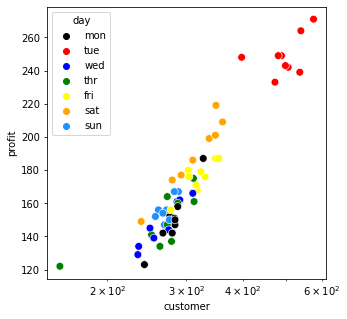

In [ ]:
#csvを読み込む関数
def read_csv(url):
    print(url)
    res = urllib.request.urlopen(url)
    res = res.read().decode("utf-8")
    df = pd.read_csv(StringIO(res) )
    return df

#実行
data = pd.read_csv('/content/drive/My Drive/profit.csv')
print(data)

# グラフサイズ設定
plt.figure(figsize = (5, 5))

# 散布図作成（ポイントが重ならないようにジッター処理を実施）
ax = sns.scatterplot(data = data, 
                     x = data["customer"], y = data["profit"],
                     hue="day",
                     palette=['black','red','blue','green','yellow','orange','dodgerblue'],
                     s=60)



# 散布図表示
ax.set(xscale="log");
#plt.show()


#ノンパラメトリック検定

In [ ]:
from scipy.stats import brunnermunzel

# 好きな数字で中央値に対する検定を行う
GroupA=[2,5,6,7,10,14]
GroupB=[11,13,22,45,66,100,120]

In [ ]:
brunnermunzel(GroupA, GroupB)

BrunnerMunzelResult(statistic=7.981596478959654, pvalue=2.629140610421743e-05)

In [ ]:
# 車と電車を使った日において，歩数は有意差があるか検定
Car = data[data["Transportation"] == "Car"]
Train = data[data["Transportation"] == "Train"]

In [ ]:
brunnermunzel(Car["Step"], Train["Step"])

BrunnerMunzelResult(statistic=0.456238389385914, pvalue=0.6487410957231519)

#相関分析

In [ ]:
# SBP(収縮期血圧）とDBP（拡張期血圧）の相関を分析
profit = data["profit"]
kyaku = data["customer"]

# 相関係数を計算して表示
result = profit.corr(kyaku) 
print(result)




0.9475769529420847


In [ ]:
# 無相関検定を行う

In [ ]:
from scipy.stats import pearsonr
r, p = pearsonr(SBP, DBP) 
print('相関係数 r = {r}'.format(r=r))
print('有意確率 p = {p}'.format(p=p))

NameError: ignored

In [ ]:
# 売上相関分析
SBP = data["SBP"]
DBP = data["DBP"]

# 相関係数を計算して表示
result = SBP.corr(DBP) 
print(result)

#歩数と呼吸との間には有意差が見られなかった。
#2つの血圧の間には有意差が見られた。


#分類

In [ ]:
from sklearn import tree

# 血圧と心拍数から交通手段を予測
#Vital = data.loc[:, ["Step","SBP","Calorie"]]
#Trans = data["Transportation"]

AAA = data.loc[:, ["profit","customer"]]
Mokuteki = data["day"]

In [ ]:
# 学習・テストを分割
X_train, X_test, y_train, y_test = train_test_split(AAA, Mokuteki, test_size=0.2, random_state=0)

In [ ]:
#決定木の実行
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

#精度を表示
print (clf.score(X_test, y_test))

0.23076923076923078


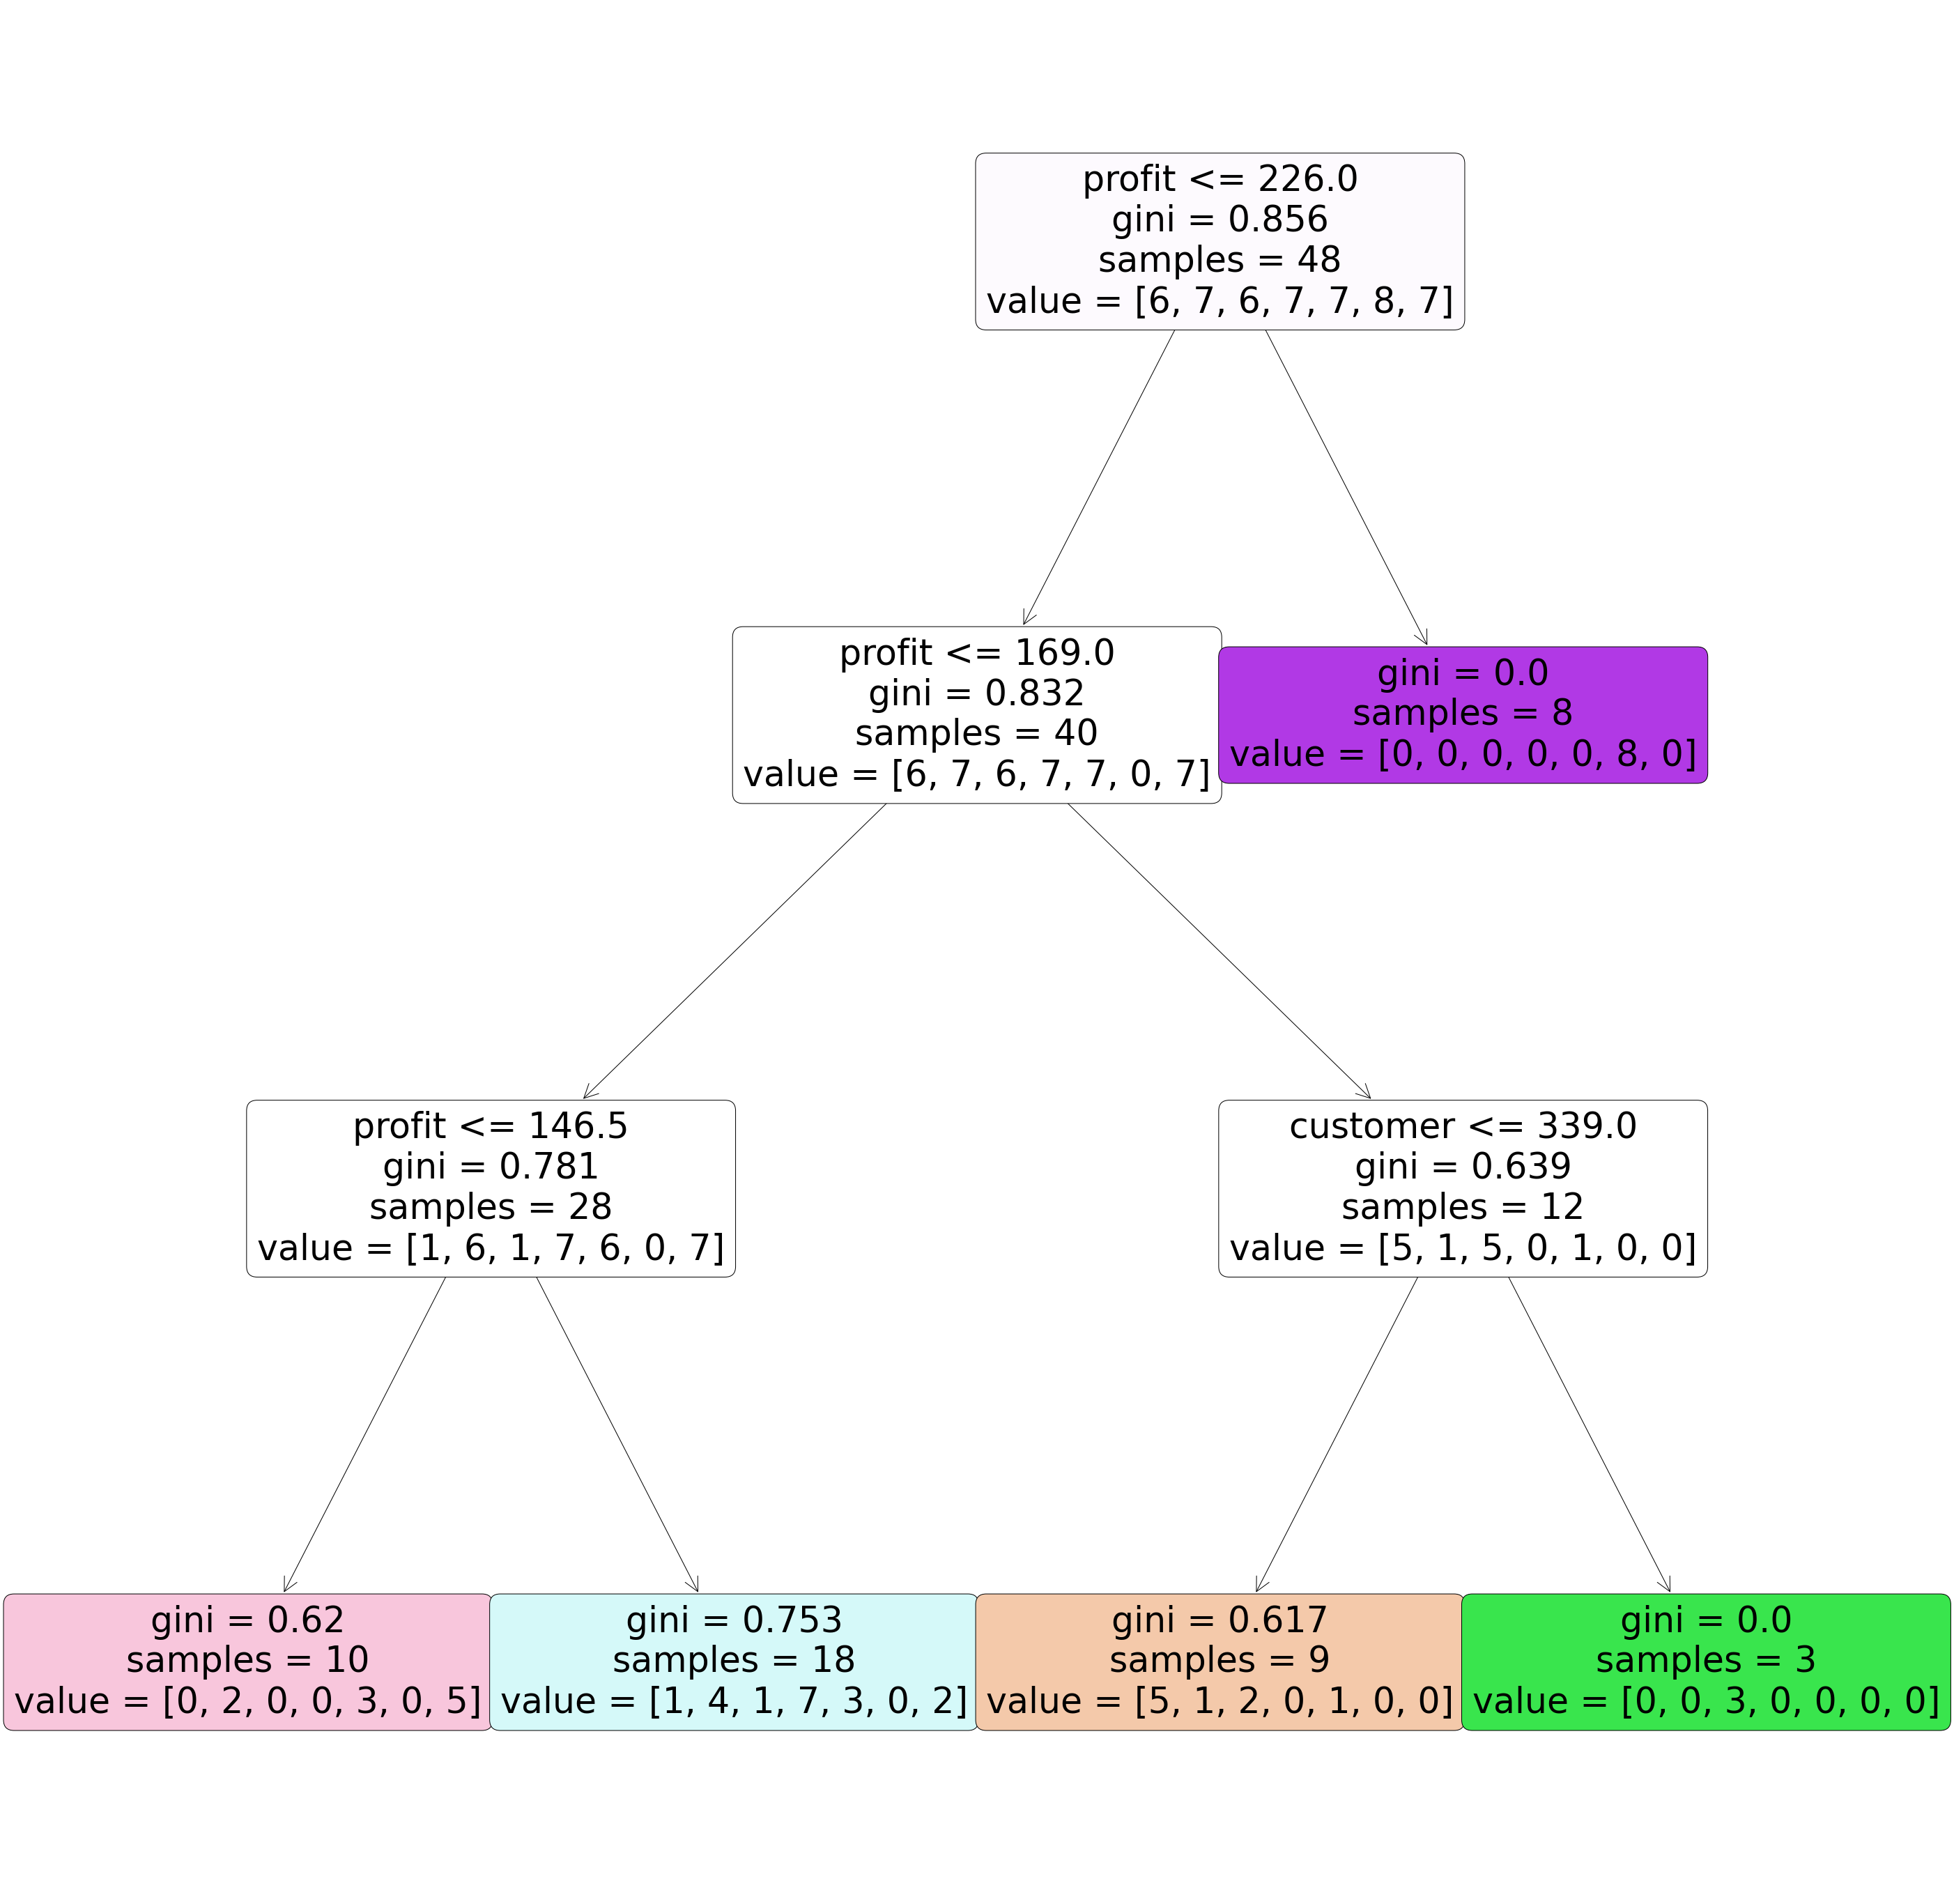

In [ ]:
# ツリーを表示
plt.figure(figsize=(50,50))
plot_tree(
    clf,
    feature_names=X_train.columns,
    filled=True, rounded=True
)

plt.show()

In [ ]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

#精度を表示
print (clf.score(X_test, y_test))

0.5679824561403509


#重回帰分析

In [ ]:
# 血圧と心拍数から呼吸数を重回帰分析で予測
Vital = data.loc[:, ["Step","Sleep","Meter","SBP"]]
Breath = data["Breath"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Vital, Breath, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 結果
coef = pd.DataFrame({"col_name":["SBP","DBP","HeartRate","Sleep"],"coefficient":model.coef_}).sort_values(by='coefficient')
print("【回帰係数】", coef)

【回帰係数】     col_name  coefficient
0        SBP    -0.002970
1        DBP     0.002745
2  HeartRate     0.004773
3      Sleep     0.006008


In [ ]:
from sklearn.metrics import mean_squared_error
y_test_pred = model.predict(X_test) #テストデータを用いて目的変数を予測
print('MSE test data: ', mean_squared_error(Y_test, y_test_pred))

MSE test data:  21.764418768294618


In [ ]:
from sklearn.metrics import r2_score
print('r^2 test data: ', r2_score(Y_test, y_test_pred)) #決定係数．0～1で，1に近いほど当てはまりが良い．

r^2 test data:  -0.0031124862695308675


#深層学習

In [ ]:
# deep learning
from keras.utils import np_utils

VitalSigns = data.loc[:, ["Meter","SBP","HeartRate", "Breath"]].values
Emotion = data["Emotion"]
dummy = pd.get_dummies(Emotion)
T = dummy.loc[:, ["anxiety","depression","peace-mind"]].values

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(VitalSigns, T, train_size=0.8, test_size=0.2)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(8, input_dim=4, activation="sigmoid"))    # 入力層4ノード, 隠れ層に10ノード, 全結合，活性化関数はsigmoid
model.add(Dense(16,activation="sigmoid")) # 出力層3ノード,全結合, sigmoid
model.add(Dense(32,activation="sigmoid")) # 出力層3ノード,全結合, sigmoid
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(3,activation="sigmoid")) # 出力層3ノード,全結合, sigmoid
model.compile(loss="categorical_crossentropy",   # 誤差関数
              optimizer="adam",     # 最適化手法
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_x, train_y, epochs=30, batch_size=10) # エポック30, ミニバッチ 10

Epoch 1/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.3589
Epoch 2/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.3557
Epoch 3/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3219 - accuracy: 0.3557
Epoch 4/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3191 - accuracy: 0.3557
Epoch 5/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.3557
Epoch 6/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.3557
Epoch 7/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3167 - accuracy: 0.3557
Epoch 8/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3142 - accuracy: 0.3557
Epoch 9/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3135 - accuracy: 0.3557
Epoch 10/30
183/183 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.3557

In [ ]:
# 評価
score = model.evaluate(test_x, test_y, verbose=1)
print("Test accuracy", score[1])

15/15 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.3618
Test accuracy 0.3618420958518982


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


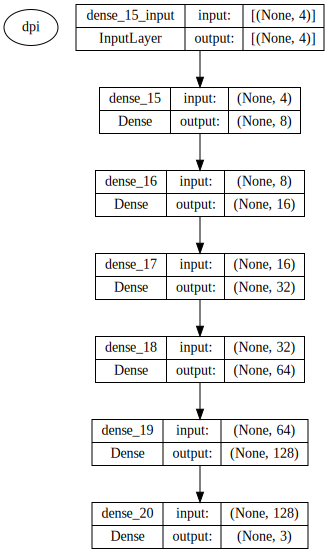

In [ ]:
!pip install pydot graphviz pydot3 pydot-ng
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot 

# モデルを可視化する。
SVG(model_to_dot(model, show_shapes=True,dpi=None).create(prog='dot', format='svg'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 40        
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 3)                 387       
                                                                 
Total params: 11,547
Trainable params: 11,547
Non-trai